In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,make_scorer, roc_curve, roc_auc_score 
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
data = np.load('FEAdata/dev_data.npy')
X_val = np.load('FEAdata/val_data.npy')
X = data.T[:-1].T
y = data.T[-1]
# testing data in kfold
kf = KFold(n_splits=5, shuffle=True, random_state=0)
kf.get_n_splits(X,y)

5

# XgBoost VS Neural Network:

In [3]:
# XGBoost model
model_xgb = XGBClassifier() # or which ever sklearn booster you're are using
model_xgb.load_model("XGBmodel.json") 

# ANN model
model_ann = tf.keras.Model()
model_ann = keras.models.load_model("ANN_model.h5")

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



592/592 [==============================] - 1s 2ms/step
_______________________________Sample Run:  1 _______________________________
XGB accuracy is  0.9868483600063381
ANN accuracy is  0.9963555696403106
XGB precision is 0.9886460101867572
ANN precision is 0.9930686830497795
XGB recall is 0.9849878422666244
ANN recall is 0.9996828417380272
XGB F1-Score is 0.9868135359847482
ANN F1-Score is 0.9963647858384701
XGB Matthews correlation coefficient is 0.9737032816130682
ANN Matthews correlation coefficient is 0.992733157076233
XGB               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9474
         1.0       0.99      0.98      0.99      9459

    accuracy                           0.99     18933
   macro avg       0.99      0.99      0.99     18933
weighted avg       0.99      0.99      0.99     18933

ANN               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      9474
         1.0       0.99   

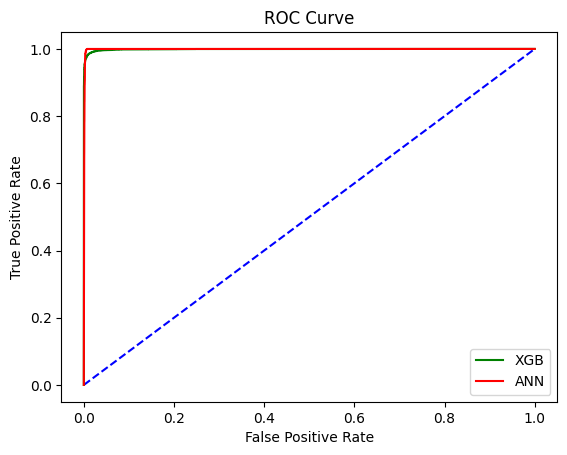

592/592 [==============================] - 1s 2ms/step
_______________________________Sample Run:  2 _______________________________
XGB accuracy is  0.98621454603074
ANN accuracy is  0.9963555696403106
XGB precision is 0.9881737310308739
ANN precision is 0.9942892742186689
XGB recall is 0.9845672575599583
ANN recall is 0.9985401459854014
XGB F1-Score is 0.9863671977017499
ANN F1-Score is 0.9964101763695957
XGB Matthews correlation coefficient is 0.9724323770420458
ANN Matthews correlation coefficient is 0.9927188015375306
XGB               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      9343
         1.0       0.99      0.98      0.99      9590

    accuracy                           0.99     18933
   macro avg       0.99      0.99      0.99     18933
weighted avg       0.99      0.99      0.99     18933

ANN               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      9343
         1.0       0.99    

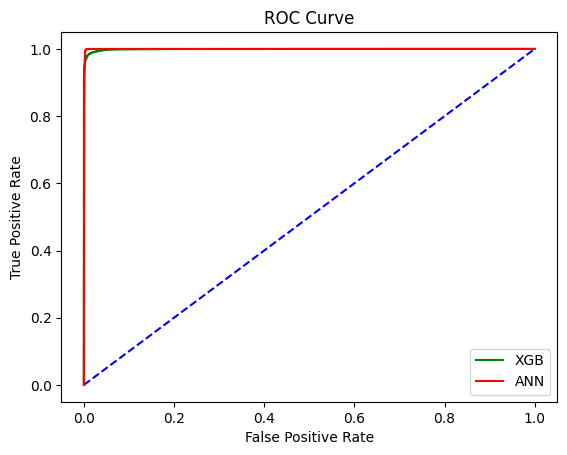

592/592 [==============================] - 2s 3ms/step
_______________________________Sample Run:  3 _______________________________
XGB accuracy is  0.9866370886811388
ANN accuracy is  0.9966196587968098
XGB precision is 0.9887459807073955
ANN precision is 0.993950971028335
XGB recall is 0.984209964792489
ANN recall is 0.9992531740104555
XGB F1-Score is 0.9864727583810085
ANN F1-Score is 0.9965950202170675
XGB Matthews correlation coefficient is 0.9732804142368511
ANN Matthews correlation coefficient is 0.993252866596975
XGB               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      9560
         1.0       0.99      0.98      0.99      9373

    accuracy                           0.99     18933
   macro avg       0.99      0.99      0.99     18933
weighted avg       0.99      0.99      0.99     18933

ANN               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      9560
         1.0       0.99     

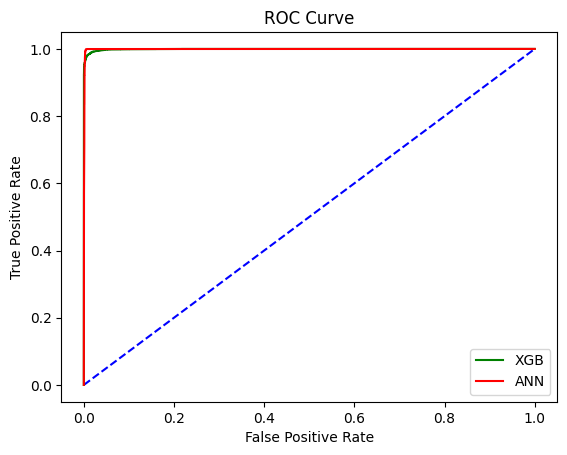

592/592 [==============================] - 1s 2ms/step
_______________________________Sample Run:  4 _______________________________
XGB accuracy is  0.9882216236201341
ANN accuracy is  0.9973591084350076
XGB precision is 0.9891754218401783
ANN precision is 0.9952541657878085
XGB recall is 0.9871849184494811
ANN recall is 0.9994704511755984
XGB F1-Score is 0.9881791677710046
ANN F1-Score is 0.9973578524624817
XGB Matthews correlation coefficient is 0.9764449338709612
ANN Matthews correlation coefficient is 0.9947271192592869
XGB               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9491
         1.0       0.99      0.99      0.99      9442

    accuracy                           0.99     18933
   macro avg       0.99      0.99      0.99     18933
weighted avg       0.99      0.99      0.99     18933

ANN               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9491
         1.0       1.00  

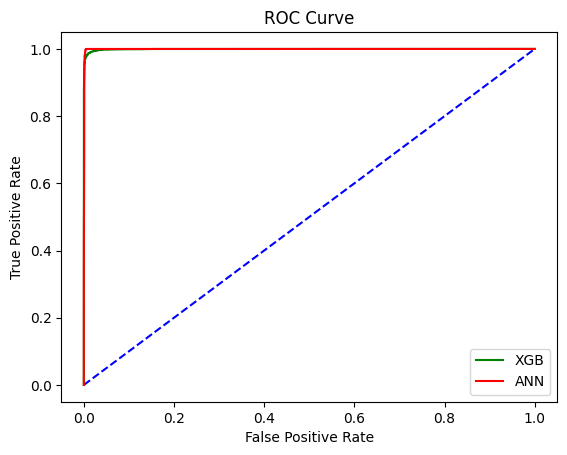

592/592 [==============================] - 1s 2ms/step
_______________________________Sample Run:  5 _______________________________
XGB accuracy is  0.9883794633424889
ANN accuracy is  0.9967779421085992
XGB precision is 0.9892086330935251
ANN precision is 0.9944286765478818
XGB recall is 0.9875369666244191
ANN recall is 0.9991550485847064
XGB F1-Score is 0.9883720930232557
ANN F1-Score is 0.9967862599441546
XGB Matthews correlation coefficient is 0.9767603292391249
ANN Matthews correlation coefficient is 0.9935671044280093
XGB               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      9464
         1.0       0.99      0.99      0.99      9468

    accuracy                           0.99     18932
   macro avg       0.99      0.99      0.99     18932
weighted avg       0.99      0.99      0.99     18932

ANN               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      9464
         1.0       0.99  

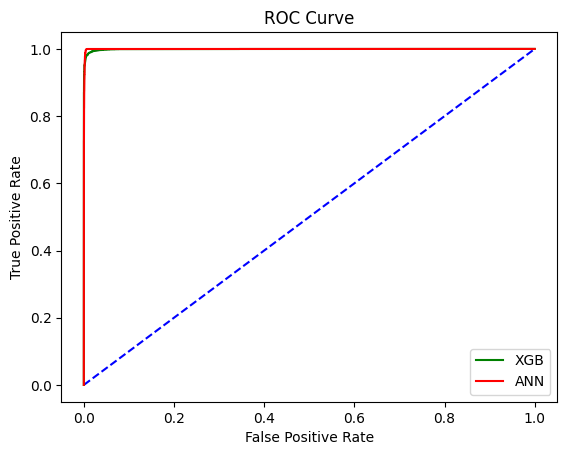

In [23]:
data = []
# Kfold cross validation for XGBoost and ANN
for i, (_, m) in enumerate(kf.split(X,y)):
    
    Xt=X[m]
    yt = y[m]
    y_pred_xgb = model_xgb.predict_proba(Xt)[:,1]
    y_pred = (y_pred_xgb > 0.5).astype(np.float32)
    y_pred_nn = model_ann.predict(Xt)
    y_pred1 = (y_pred_nn > 0.5).astype(np.float32)
    
    print('_______________________________Sample Run: ', i+1,'_______________________________')
    print("XGB accuracy is  {}".format(accuracy_score(yt, y_pred)))
    print("ANN accuracy is  {}".format(accuracy_score(yt, y_pred1)))
    # Precision
    print("XGB precision is {}".format(precision_score(yt, y_pred)))
    print("ANN precision is {}".format(precision_score(yt, y_pred1)))
    # Recall 
    print("XGB recall is {}".format(recall_score(yt, y_pred)))
    print("ANN recall is {}".format(recall_score(yt, y_pred1)))
    # F1 score
    print("XGB F1-Score is {}".format(f1_score(yt, y_pred)))
    print("ANN F1-Score is {}".format(f1_score(yt, y_pred1)))
    # Matthews correlation coefficient
    print("XGB Matthews correlation coefficient is {}".format(matthews_corrcoef(yt, y_pred)))
    print("ANN Matthews correlation coefficient is {}".format(matthews_corrcoef(yt, y_pred1)))
    # Classification report
    print("XGB", classification_report(yt, y_pred))
    print("ANN", classification_report(yt, y_pred1))

    fp, tp, threshold = roc_curve(yt, y_pred_xgb)
    
    plt.plot([0, 1], [0, 1], 'b', linestyle='--')
    # Plot the ROC curve
    plt.plot(fp, tp, 'g', label='XGB')

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(yt, y_pred_xgb)
    print('AUC score XGB:', auc)

    fpr, tpr, thresholds = roc_curve(yt, y_pred_nn)
    # Calculate the area under the ROC curve (AUC)
    auc1 = roc_auc_score(yt, y_pred_nn.flatten())
    print('AUC score NN:', auc1)
    data.append([[accuracy_score(yt, y_pred),precision_score(yt, y_pred),recall_score(yt, y_pred), f1_score(yt, y_pred), matthews_corrcoef(yt, y_pred), auc], [accuracy_score(yt, y_pred1) ,precision_score(yt, y_pred1),recall_score(yt, y_pred1),f1_score(yt, y_pred1), matthews_corrcoef(yt, y_pred1), auc1]])
    # Plot the ROC curve
    plt.plot(fpr, tpr, 'r', label='ANN'),
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [26]:
'''
----------------------------------:Conclusions:------------------------------------
1. Neural Network Model performance is slightly better than XGBoost model in terms of
   accuracy, precision, recall, F1-score and Matthews correlation coefficient.
2. Neural Network Model has better AUC score than XGBoost model in most of the tests.
3. So finally we will use Neural Network Model for predictions on validation data
'''
# Predictions on validation data Using ANN model  
# pred_prob = model_ann.predict(X_val)
# import pandas as pd
# df = pd.read_csv("credit_data/case_study_validation.csv")
# df1 =pd.DataFrame(df["primary_key"], columns = ['primary_key'], dtype='object') 
# pred = pd.DataFrame(pred_prob, columns = ['Probabilities'], dtype='float64')
# s1 = [df1,pred]
# pd.concat(s1, axis=1).to_csv('Submission/submission.csv', index=False)

'\n----------------------------------:Conclusions:------------------------------------\n1. Neural Network Model performance is slightly better than XGBoost model in terms of\n   accuracy, precision, recall, F1-score and Matthews correlation coefficient.\n2. Neural Network Model has better AUC score than XGBoost model in most of the tests.\n3. So finally we will use Neural Network Model for predictions on validation data\n'

In [27]:
# df = pd.read_csv("Submission/submission.csv")
# df['Probabilities'] = df['Probabilities'].apply(lambda x: 1 if x > 0.5 else 0)
# (np.array(df['Probabilities'])> 0.5).astype(np.float32).sum()
# pb = model_xgb.predict(X_val)
# (pb> 0.5).astype(np.float32).sum()
# nm = np.array(pd.read_csv("submission.csv"))
# (nm.T[1] > 0.5).astype(np.float32).sum()

In [47]:
def plot_metrics(data):
    # convert the data string to a numpy array
    data_array = np.array(data)

    # extract the Xgboost and ANN data from the array
    xgb_data = data_array[:,0,:]
    ann_data = data_array[:,1,:]

    # create a figure with subplots for each metric
    fig, axs = plt.subplots(1, 6, figsize=(20, 5))

    # plot accuracy
    axs[0].plot(xgb_data[:,0], label='Xgboost')
    axs[0].plot(ann_data[:,0], label='ANN')
    axs[0].set_title('Accuracy')
    axs[0].legend()

    # plot precision
    axs[1].plot(xgb_data[:,1], label='Xgboost')
    axs[1].plot(ann_data[:,1], label='ANN')
    axs[1].set_title('Precision')
    axs[1].legend()

    # plot recall
    axs[2].plot(xgb_data[:,2], label='Xgboost')
    axs[2].plot(ann_data[:,2], label='ANN')
    axs[2].set_title('Recall')
    axs[2].legend()

    # plot F1-score
    axs[3].plot(xgb_data[:,3], label='Xgboost')
    axs[3].plot(ann_data[:,3], label='ANN')
    axs[3].set_title('F1-score')
    axs[3].legend()

    # plot ROC-AUC
    axs[4].plot(xgb_data[:,4], label='Xgboost')
    axs[4].plot(ann_data[:,4], label='ANN')
    axs[4].set_title('Matthews correlation ')
    axs[4].legend()

    # plot ROC-AUC
    axs[5].plot(xgb_data[:,5], label='Xgboost')
    axs[5].plot(ann_data[:,5], label='ANN')
    axs[5].set_title('AUC')
    axs[5].legend()

    # set the x-axis labels for all subplots
    for ax in axs.flat:
        ax.set(xlabel='Fold')

    # set the title of the entire figure
    fig.suptitle('Xgboost vs. ANN Performance in 5-fold Cross Validation')
    # plt.legend()
    # show the plot
    plt.show()


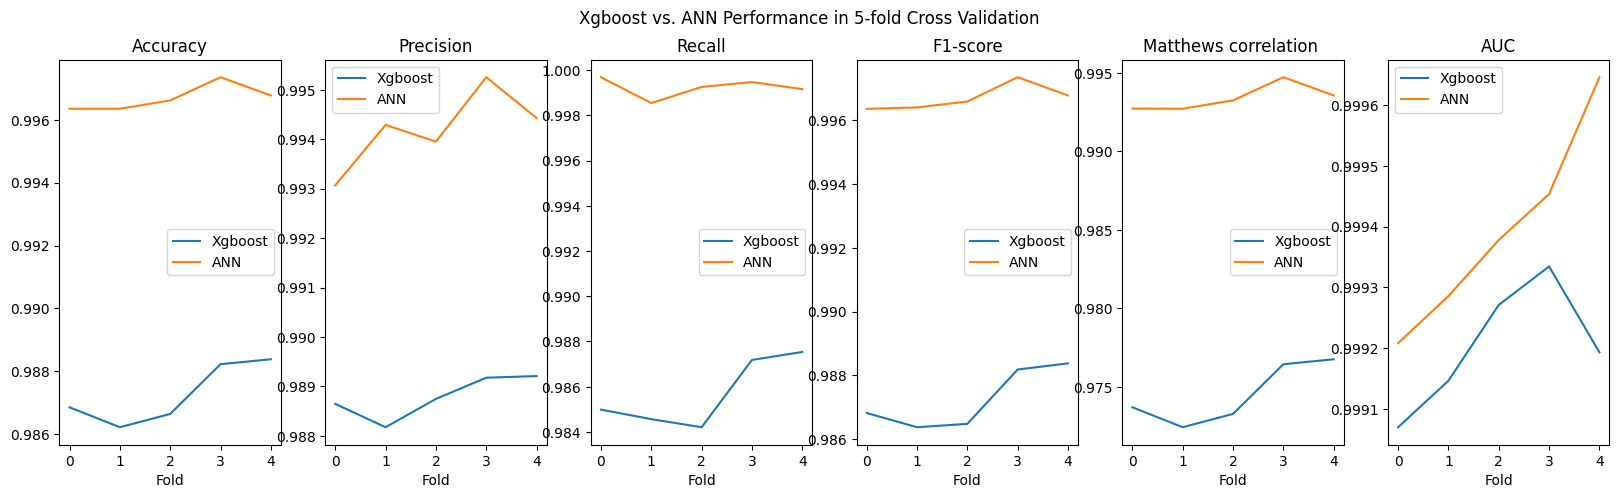

In [48]:
plot_metrics(data)